In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import scipy.spatial

In [3]:


df = pd.read_csv('../../../piw-route-choice-varying-beta_routes_usage.csv')
df = df.set_index('route')
#df = df.drop(columns=["route"])
df = df.transpose()
#df = df.loc[:, (df.max(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.head()

route,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-12,9-13,9-14,9-2,9-3,9-4,9-5,9-6,9-7,9-8
0,0.1,0.008886,0.008617,0.006109,0.003709,0.007984,0.006942,0.006604,0.003477,0.005098,...,0.003560,0.010959,0.020454,0.000210,0.001195,0.000433,0.002667,0.002580,0.001283,0.002271
1,0.3,0.008441,0.012134,0.002605,0.003708,0.007989,0.008022,0.005531,0.004312,0.004261,...,0.001555,0.010961,0.020457,0.000218,0.001212,0.000442,0.003261,0.002021,0.001691,0.001869
2,0.5,0.007862,0.013201,0.001534,0.003713,0.007985,0.008722,0.004835,0.004627,0.003943,...,0.000852,0.010962,0.020457,0.000215,0.001210,0.000440,0.003597,0.001702,0.001752,0.001818
3,0.7,0.007884,0.013936,0.000822,0.003712,0.007981,0.009539,0.004019,0.004798,0.003782,...,0.000380,0.010961,0.020455,0.000214,0.001209,0.000442,0.003914,0.001381,0.001777,0.001784
4,0.9,0.007501,0.014138,0.000598,0.003714,0.007991,0.008974,0.004581,0.005068,0.003508,...,0.000323,0.010961,0.020456,0.000215,0.001212,0.000442,0.003611,0.001671,0.001914,0.001658


In [4]:
df_ref = pd.read_csv('../../../piw-route-choice-shortest-path_routes_usage.csv')
df_ref = df_ref.set_index('route')
#df_ref = df_ref.drop(columns=["route"])
df_ref = df_ref.transpose()
#df_ref = df_ref.loc[:, (df_ref.max(axis=0) > 0.005)]
df_ref = df_ref.reset_index()
df_ref = df_ref.rename(columns={'index':"beta"})
df_ref = df_ref.drop(index=[1])
df_ref.head()

route,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-12,9-13,9-14,9-2,9-3,9-4,9-5,9-6,9-7,9-8
0,-1,0.013957,0.001689,0.013072,0.003718,0.007988,0.002032,0.011521,0.003046,0.005533,...,0.007797,0.010963,0.020457,0.00022,0.001226,0.00044,0.002429,0.002877,0.001558,0.002001


In [13]:
df_new = df_ref.append(df, ignore_index=True)
#df_new = df_new.reset_index()
#df_new = df_new.rename(columns={'index':"route"})
#df_new = df_new.set_index('route')
df_new["beta"] = pd.to_numeric(df_new["beta"], downcast="float")
#df_new = df_new.loc[:, (df_new.max(axis=0) > 0.01)]
df_new.head()

,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-6,9-7,9-8,11-11,11-9,12-12,13-12,14-12,2-5,4-7
0,-1.0,0.013957,0.001689,0.013072,0.003718,0.007988,0.002032,0.011521,0.003046,0.005533,...,0.002877,0.001558,0.002001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.008886,0.008617,0.006109,0.003709,0.007984,0.006942,0.006604,0.003477,0.005098,...,0.002580,0.001283,0.002271,0.000270,0.000173,0.000164,0.000213,0.000101,0.000601,0.000178
2,0.3,0.008441,0.012134,0.002605,0.003708,0.007989,0.008022,0.005531,0.004312,0.004261,...,0.002021,0.001691,0.001869,0.000336,0.000167,0.000199,0.000104,0.000044,0.000701,0.000285
3,0.5,0.007862,0.013201,0.001534,0.003713,0.007985,0.008722,0.004835,0.004627,0.003943,...,0.001702,0.001752,0.001818,0.000339,0.000177,0.000218,0.000072,0.000028,0.000737,0.000324
4,0.7,0.007884,0.013936,0.000822,0.003712,0.007981,0.009539,0.004019,0.004798,0.003782,...,0.001381,0.001777,0.001784,0.000339,0.000176,0.000225,0.000031,0.000012,0.000836,0.000284


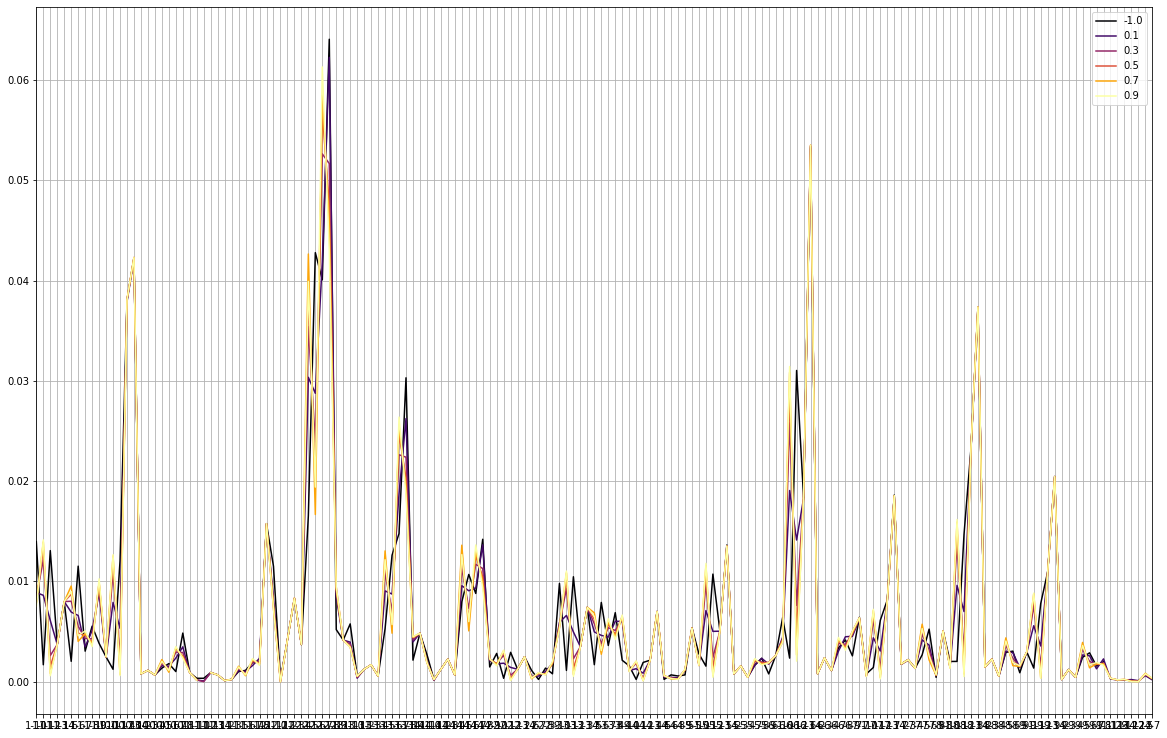

In [14]:

plt.figure(figsize=(20,13))
parallel_coordinates(df_new, 'beta', axvlines= False, colormap="inferno")
plt.show()

In [15]:
for index, row in df_new.iterrows():
    print(scipy.spatial.distance.euclidean(df_new.iloc[:,0], df_new.iloc[:,index])
)

0.0
1.6245602678335616
1.608417712140092
1.6339578283163214
1.6244862918648242
1.6206253341151933
